# High & Low time - profitable

### Import Library

In [3]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_ta as ta

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [4]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [57]:
def get_high_time(tick):
    highest_value = tick.max()
    if not np.isnan(highest_value):
        found = tick[tick == highest_value]
        return 100 * found.index.hour + found.index.minute

def get_low_time(tick):
    lowest_value = tick.min()
    if not np.isnan(lowest_value):
        found = tick[tick == lowest_value]
        return 100 * found.index.hour + found.index.minute

In [58]:
data2 = dataset.copy()
data2 = data2[100*data.index.hour + data.index.minute < 1430]
data2['high_time'] = data2['Close']
data2['low_time'] = data2['Close']
day_data = data2.resample("D").agg({
    'high_time': get_high_time,
    'low_time': get_low_time
    })
day_data.dropna(inplace=True)
day_data

,high_time,low_time
Date,,
2018-08-13,1425,915
2018-08-14,1405,1110
2018-08-15,1030,1425
2018-08-16,1415,1110
2018-08-17,1130,1355
...,...,...
2024-07-10,1015,1425
2024-07-11,1010,1425
2024-07-12,930,1420


In [ ]:
FAST_EMA_LENGTH = 5
LOW_EMA_LENGTH = 26
data = dataset.copy()
data["ema_f"] = ta.ema(data["Close"], length=FAST_EMA_LENGTH)
data["ema_l"] = ta.ema(data["Close"], length=LOW_EMA_LENGTH)
data["ema_h"] = data.apply(lambda r: r['ema_f'] - r['ema_l'], axis=1)
data["ema_h_s1"] = data["ema_h"].shift(1)
data["ema_h_s2"] = data["ema_h"].shift(2)
data["RSI"] = ta.rsi(data["Close"], length=14)

In [59]:
data = data.assign(time_d=pd.PeriodIndex(data.index, freq='1D').to_timestamp())
data = pd.merge(data, day_data, left_on="time_d", right_index=True, how="left")
data = data.drop(columns=['Volume', 'time_d'])
data

,Open,High,Low,Close,ema_f,ema_l,ema_h,ema_h_s1,ema_h_s2,RSI,high_time,low_time
Date,,,,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,NaN,NaN,NaN,NaN,NaN,NaN,1425,915
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,NaN,NaN,NaN,NaN,NaN,NaN,1425,915
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,NaN,NaN,NaN,NaN,NaN,NaN,1425,915
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,NaN,NaN,NaN,NaN,NaN,NaN,1425,915
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,943.160000,NaN,NaN,NaN,NaN,NaN,1425,915
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-16 14:15:00,1300.5,1302.1,1299.1,1302.0,1302.321824,1304.494438,-2.172614,-2.211257,-1.597409,37.030218,1040,1410
2024-07-16 14:20:00,1302.0,1303.4,1301.1,1302.4,1302.347883,1304.339294,-1.991412,-2.172614,-2.211257,39.534788,1040,1410
2024-07-16 14:25:00,1302.4,1302.4,1301.1,1301.8,1302.165255,1304.151198,-1.985943,-1.991412,-2.172614,37.148007,1040,1410


In [60]:
data = data[(100*data.index.hour + data.index.minute > 910) & (100*data.index.hour + data.index.minute < 1425)]

In [51]:
# 0: do nothing, 1: long, 2: short
def apply_group(r):
    group = 0
    if r['Close'] > r['Day_High'] - 3:
        group = 2
    elif r['Close'] < r['Day_Low'] + 3:
        group = 1
    return group
data['group'] = data.apply(lambda r: apply_group(r), axis=1)
data

,Open,High,Low,Close,ema_f,ema_l,ema_h,ema_h_s1,ema_h_s2,RSI,Day_High,Day_Low,group
Date,,,,,,,,,,,,,
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,NaN,NaN,NaN,NaN,NaN,NaN,954.6,942.3,1
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,943.160000,NaN,NaN,NaN,NaN,NaN,954.6,942.3,1
2018-08-13 09:25:00,943.8,945.9,943.7,945.3,943.873333,NaN,NaN,NaN,NaN,NaN,954.6,942.3,0
2018-08-13 09:30:00,945.2,945.5,943.9,944.0,943.915556,NaN,NaN,NaN,NaN,NaN,954.6,942.3,1
2018-08-13 09:35:00,944.0,944.5,943.7,943.7,943.843704,NaN,NaN,NaN,NaN,NaN,954.6,942.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-16 14:00:00,1303.1,1304.1,1302.5,1303.1,1303.986156,1305.239233,-1.253078,-0.981138,-0.501351,36.412270,1308.7,1299.1,0
2024-07-16 14:05:00,1303.3,1303.4,1301.7,1302.3,1303.424104,1305.021512,-1.597409,-1.253078,-0.981138,33.027699,1308.7,1299.1,0
2024-07-16 14:10:00,1302.4,1302.5,1300.1,1300.6,1302.482736,1304.693993,-2.211257,-1.597409,-1.253078,27.234495,1308.7,1299.1,1


In [52]:
len(data[data.group == 2])/len(data)

0.24667228814069747

In [53]:
data.dropna(inplace=True)

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [54]:
 # split dataset in features and target variable
feature_cols = ["ema_h", "ema_h_s1", "ema_h_s2", "RSI"]
X = data[feature_cols]  # Features
y = data['group'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # 80% training and 20% test

In [55]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [56]:
%%time

parameters = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [8],
    'gamma': [0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_test, y_test)]
# Create XGBClassifier model
model_xgb = xgb.XGBClassifier(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model_xgb, parameters)

clf.fit(X_train, y_train)

CPU times: user 4min 19s, sys: 1.37 s, total: 4min 20s
Wall time: 44.6 s


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     eval_set=[(                        ema_h  ema_h_s1  ema_h_s2        RSI
Date                                                        
2018-08-13 11:15:00  0.487004  0.460167 -0.021715  55.503674
2018-08-13 11:20:00  0.595249  0.48...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [0.01, 0.02], 'learning_rate': [0.01, 0.05],
                         'max_depth': [8], 'n_estimators': [100, 150, 200],
                         'random_state': [42]})

In [57]:
print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.02, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200, 'random_state': 42}
Best validation score = 0.6530032009037846


In [58]:
best_model = xgb.XGBClassifier(**clf.best_params_, objective='reg:squarederror')
best_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.02, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

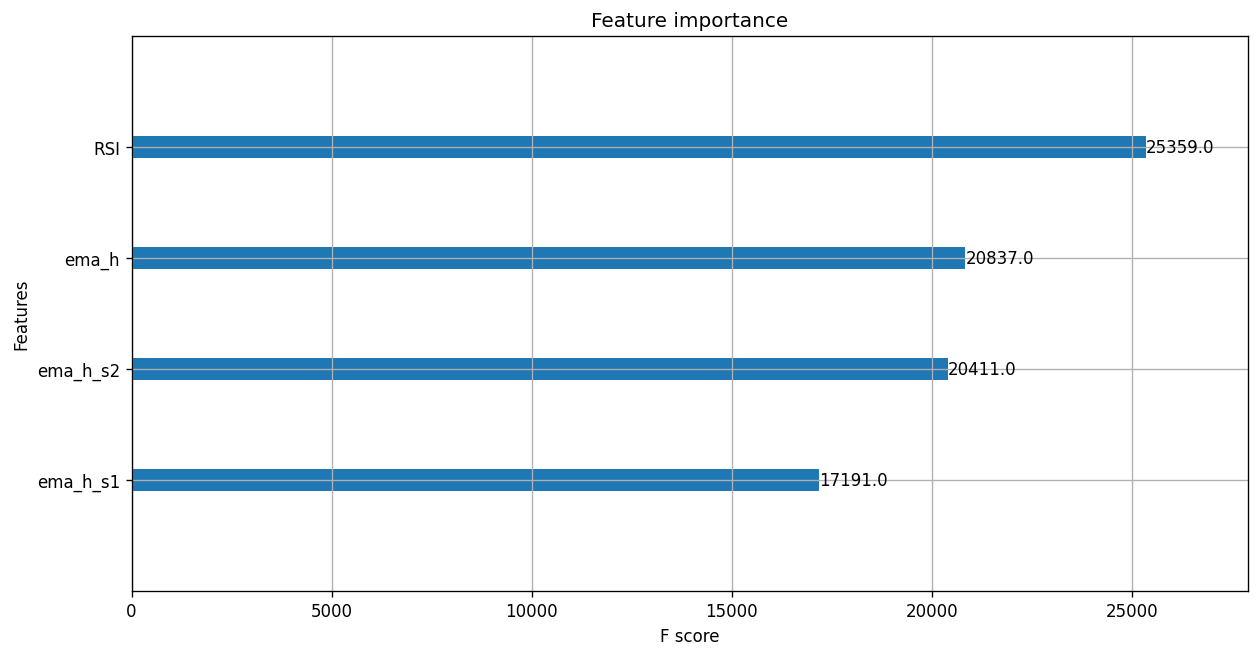

In [59]:
plot_importance(best_model)

In [60]:
y_pred = best_model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [0 0 0 0 0]
y_pred = [0 2 2 2 2]


In [61]:
from sklearn.metrics import mean_squared_error
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 1.052191595119747


In [62]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("R2_score:", metrics.r2_score(y_test, y_pred))

Accuracy: 0.5994125621328513
R2_score: -0.7927427423983593


In [63]:
X_result = X_test.copy()
X_result = X_result.assign(Predicts=y_pred)
X_result = X_result[['Predicts']]
data_result = data.copy()
data_result = pd.merge(data_result, X_result, left_index=True, right_index=True, how="left")
data_result.dropna(inplace=True)
data_result

,Open,High,Low,Close,ema_f,ema_l,ema_h,ema_h_s1,ema_h_s2,RSI,Day_High,Day_Low,group,Predicts
Date,,,,,,,,,,,,,,
2023-05-12 13:50:00,1051.6,1052.6,1051.3,1052.6,1052.419649,1052.627658,-0.208008,-0.300396,-0.018049,49.890323,1062.0,1048.4,0,0.0
2023-05-12 13:55:00,1052.6,1052.7,1052.1,1052.5,1052.446433,1052.618201,-0.171769,-0.208008,-0.300396,49.011528,1062.0,1048.4,0,2.0
2023-05-12 14:00:00,1052.4,1052.6,1051.8,1052.4,1052.430955,1052.602038,-0.171083,-0.171769,-0.208008,48.099112,1062.0,1048.4,0,2.0
2023-05-12 14:05:00,1052.5,1053.5,1052.0,1053.4,1052.753970,1052.661147,0.092823,-0.171083,-0.171769,56.766693,1062.0,1048.4,0,2.0
2023-05-12 14:10:00,1053.4,1056.5,1053.4,1055.8,1053.769313,1052.893654,0.875659,0.092823,-0.171083,69.801496,1062.0,1048.4,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-16 14:00:00,1303.1,1304.1,1302.5,1303.1,1303.986156,1305.239233,-1.253078,-0.981138,-0.501351,36.412270,1308.7,1299.1,0,0.0
2024-07-16 14:05:00,1303.3,1303.4,1301.7,1302.3,1303.424104,1305.021512,-1.597409,-1.253078,-0.981138,33.027699,1308.7,1299.1,0,1.0
2024-07-16 14:10:00,1302.4,1302.5,1300.1,1300.6,1302.482736,1304.693993,-2.211257,-1.597409,-1.253078,27.234495,1308.7,1299.1,1,1.0


In [64]:
data_result[(data_result.group == 1) & (data_result.Predicts == 2)]

,Open,High,Low,Close,ema_f,ema_l,ema_h,ema_h_s1,ema_h_s2,RSI,Day_High,Day_Low,group,Predicts
Date,,,,,,,,,,,,,,
2023-05-16 10:00:00,1066.2,1066.5,1066.1,1066.1,1065.991435,1066.884501,-0.893065,-1.010108,-1.201313,44.173380,1069.3,1064.5,1,2.0
2023-05-16 10:10:00,1066.7,1067.0,1066.3,1066.3,1066.251749,1066.828550,-0.576801,-0.643210,-0.893065,45.977092,1069.3,1064.5,1,2.0
2023-05-16 10:15:00,1066.5,1066.5,1066.3,1066.3,1066.267833,1066.789398,-0.521565,-0.576801,-0.643210,45.977092,1069.3,1064.5,1,2.0
2023-05-16 10:20:00,1066.3,1066.4,1065.6,1066.0,1066.178555,1066.730924,-0.552369,-0.521565,-0.576801,43.925154,1069.3,1064.5,1,2.0
2023-05-16 10:30:00,1065.6,1066.3,1065.6,1066.3,1066.112691,1066.628296,-0.515605,-0.635523,-0.552369,47.132638,1069.3,1064.5,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-05 09:55:00,1309.3,1310.2,1309.1,1309.7,1309.426065,1308.835571,0.590494,0.522681,0.601916,55.365443,1316.5,1307.2,1,2.0
2024-07-05 11:30:00,1309.0,1309.0,1308.7,1308.7,1308.935445,1309.827371,-0.891926,-0.864393,-0.785215,42.698543,1316.5,1307.2,1,2.0
2024-07-05 13:20:00,1309.1,1310.5,1308.9,1310.1,1309.663515,1309.791129,-0.127613,-0.321146,-0.285823,52.101192,1316.5,1307.2,1,2.0


In [65]:
data_result[(data_result.group == 2) & (data_result.Predicts == 1)]

,Open,High,Low,Close,ema_f,ema_l,ema_h,ema_h_s1,ema_h_s2,RSI,Day_High,Day_Low,group,Predicts
Date,,,,,,,,,,,,,,
2023-05-16 13:45:00,1067.6,1067.6,1066.2,1066.4,1067.409596,1067.631845,-0.222249,0.184002,0.414768,38.905510,1069.3,1064.5,2,1.0
2023-05-16 13:55:00,1066.4,1067.0,1066.3,1067.0,1067.026487,1067.493695,-0.467207,-0.493459,-0.222249,45.529288,1069.3,1064.5,2,1.0
2023-05-26 10:15:00,1056.7,1057.0,1056.0,1056.1,1056.676331,1056.831792,-0.155461,0.074161,0.149182,44.885233,1058.9,1054.3,2,1.0
2023-05-31 09:35:00,1066.9,1066.9,1065.6,1065.9,1066.705592,1066.931077,-0.225486,0.094824,0.231933,41.484984,1068.5,1059.1,2,1.0
2023-05-31 10:05:00,1065.7,1065.8,1065.3,1065.8,1065.984030,1066.595336,-0.611306,-0.582918,-0.471612,41.750897,1068.5,1059.1,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-21 10:40:00,1307.2,1307.2,1306.7,1307.0,1307.235401,1308.667502,-1.432101,-1.447801,-1.499322,35.402628,1309.7,1297.2,2,1.0
2024-05-21 10:45:00,1307.0,1307.8,1306.5,1307.5,1307.323601,1308.581020,-1.257420,-1.432101,-1.447801,40.385579,1309.7,1297.2,2,1.0
2024-05-21 10:50:00,1307.4,1307.7,1307.0,1307.4,1307.349067,1308.493537,-1.144470,-1.257420,-1.432101,39.725560,1309.7,1297.2,2,1.0


In [68]:
data_result[(data_result.index > '2024-07-15 08:00:00') & (data_result.index < '2024-07-15 16:00:00')]

,Open,High,Low,Close,ema_f,ema_l,ema_h,ema_h_s1,ema_h_s2,RSI,Day_High,Day_Low,group,Predicts
Date,,,,,,,,,,,,,,
2024-07-15 09:15:00,1303.2,1304.2,1303.2,1303.4,1302.675717,1303.409168,-0.733451,-1.096326,-1.598331,49.645026,1305.6,1292.7,2,0.0
2024-07-15 09:20:00,1303.3,1303.8,1303.1,1303.1,1302.817144,1303.386267,-0.569122,-0.733451,-1.096326,48.395593,1305.6,1292.7,2,0.0
2024-07-15 09:25:00,1303.3,1303.3,1302.2,1302.9,1302.844763,1303.350247,-0.505484,-0.569122,-0.733451,47.536660,1305.6,1292.7,2,2.0
2024-07-15 09:30:00,1302.9,1304.0,1302.9,1304.0,1303.229842,1303.398377,-0.168535,-0.505484,-0.569122,52.527182,1305.6,1292.7,2,0.0
2024-07-15 09:35:00,1303.9,1304.7,1303.9,1304.4,1303.619895,1303.472571,0.147324,-0.168535,-0.505484,54.232098,1305.6,1292.7,2,0.0
2024-07-15 09:40:00,1304.4,1305.1,1304.3,1304.5,1303.913263,1303.548677,0.364586,0.147324,-0.168535,54.670391,1305.6,1292.7,2,0.0
2024-07-15 09:45:00,1304.5,1305.5,1304.4,1305.5,1304.442175,1303.693219,0.748956,0.364586,0.147324,58.908218,1305.6,1292.7,2,0.0
2024-07-15 09:50:00,1305.2,1305.6,1304.3,1304.5,1304.461450,1303.752981,0.708469,0.748956,0.364586,53.519809,1305.6,1292.7,2,0.0
2024-07-15 09:55:00,1304.4,1304.6,1303.8,1304.0,1304.307634,1303.771279,0.536355,0.708469,0.748956,51.007498,1305.6,1292.7,2,0.0


In [67]:
from sklearn.ensemble import GradientBoostingClassifier
# Create GradientBoostingClassifier model
gbc = GradientBoostingClassifier(learning_rate=0.05, random_state=42, n_estimators=200)

# Train
gbc = gbc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gbc.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("R2_score:", metrics.r2_score(y_test, y_pred))

Accuracy: 0.5886428679017924
R2_score: -0.882694260716393
